# K-mean Clustering

## Load and Explore Data

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import mutual_info_score
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import davies_bouldin_score 

Load the Data

In [2]:
data = pd.read_csv("segmentation data.csv")
data.drop(columns=["ID"], inplace=True)
print(data.head())
print(data.info())

   Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB
No

## Visualize the Data and clean the data if necessary

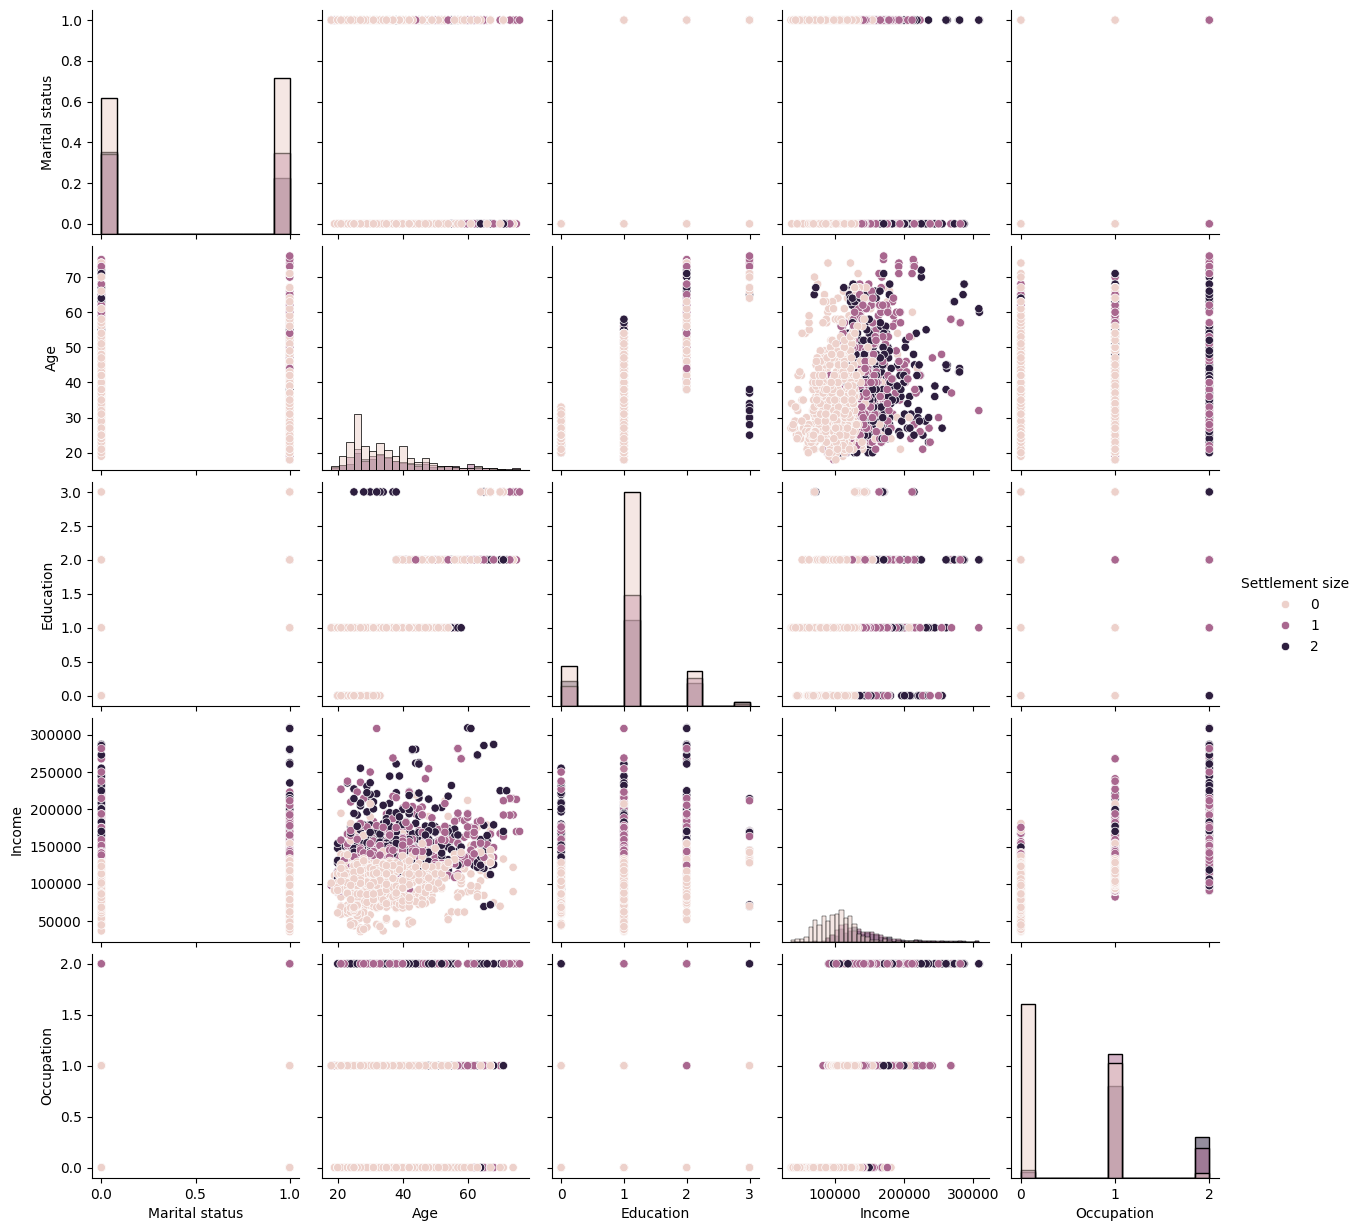

<Figure size 640x480 with 0 Axes>

In [3]:
sns.pairplot(data.iloc[:,1:],hue='Settlement size',diag_kind="hist")
plt.figure()
plt.show()

Visualize the Data

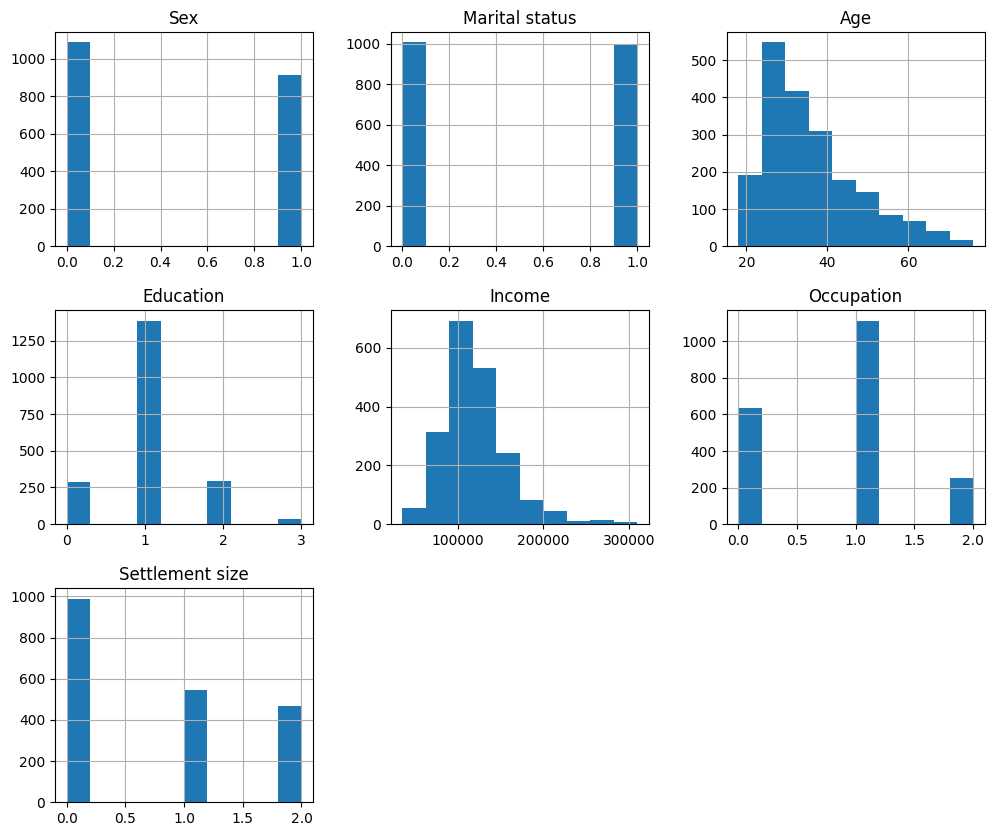

In [4]:
data.hist(figsize=(12, 10))
plt.show()

Correlation Matrix

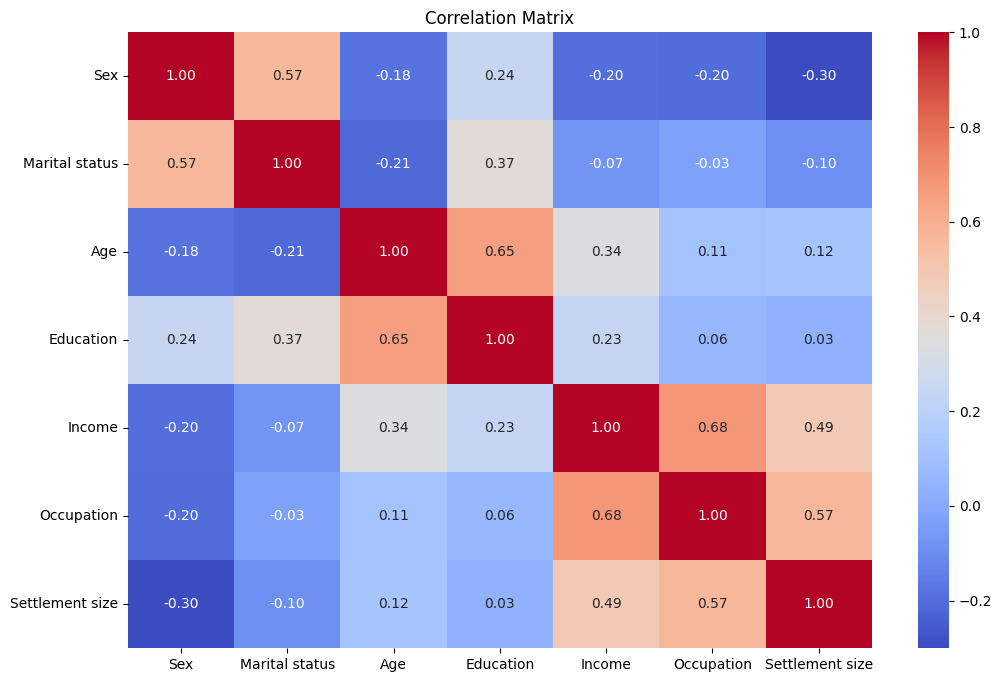

In [5]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

using mutal info score to select important features

In [6]:
high_mi_pairs = []

for var1, var2 in combinations(data.columns, 2):
    mi = mutual_info_score(data[var1], data[var2])
    if mi >= 0.5:
        high_mi_pairs.append((var1, var2, mi))
    # print(f"Mutual Information between {var1} and {var2}: {mi}")

for var1, var2, mi in high_mi_pairs:
    print(f"Mutual Information between {var1} and {var2}: {mi}")

Mutual Information between Sex and Income: 0.6832062839943194
Mutual Information between Marital status and Income: 0.6910432388181778
Mutual Information between Age and Income: 3.675199489369958
Mutual Information between Education and Income: 0.8834306582065896
Mutual Information between Income and Occupation: 0.9502634909955765
Mutual Information between Income and Settlement size: 1.032994122396869


Standardize the data

In [7]:
df = data[["Sex", "Marital status", "Age", "Income", "Education", "Occupation", "Settlement size"]]

scaler = StandardScaler()
df_data = scaler.fit_transform(df)

## Perform K-Mean Clustering

Optimal Number of clusters using Elbow method

In [8]:
inertia = []
silhouette_scores = []
dbs = []

for k in range(2, 100):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_data, kmeans.labels_))
    dbs.append(davies_bouldin_score(df_data, kmeans.labels_))

c:\Users\Tonkhaow\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Tonkhaow\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Tonkhaow\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Tonkhaow\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

Plot Inertia to identify the elbow point

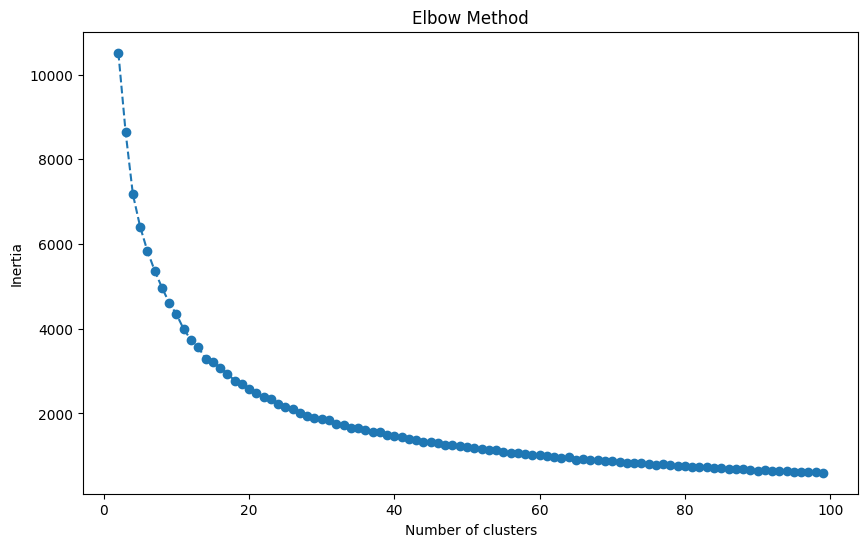

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 100), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Plot silhouette score 

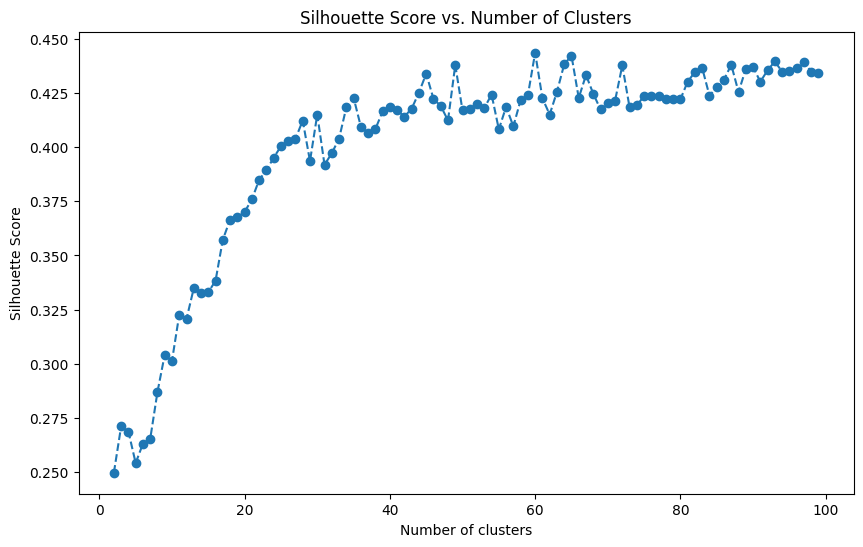

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 100), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

Plot DBI

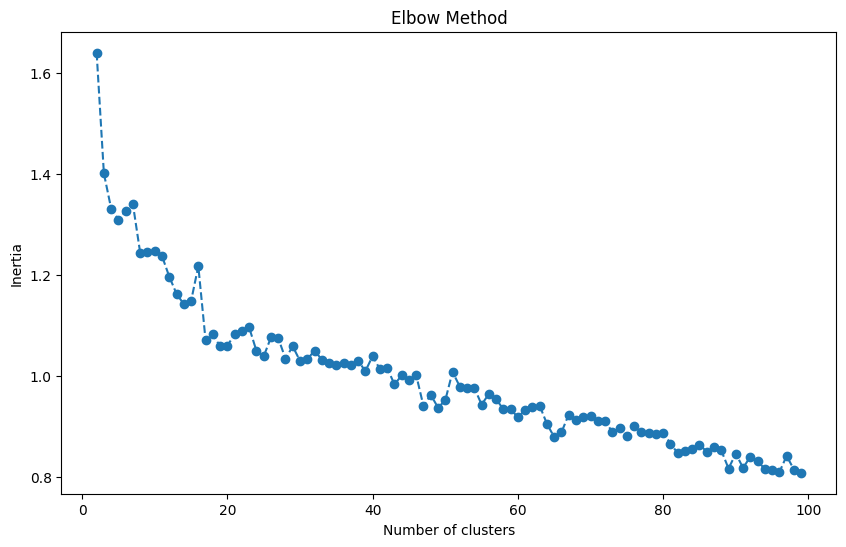

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 100), dbs, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Choosing the best cluster using Silhouette Score

In [15]:
best_k_silhouette = np.argmax(silhouette_scores) + 2  # +2 because range starts from 2
print("Best K from Silhouette Score:", best_k_silhouette)

# Find optimal K using WCSS 
delta_wcss = np.diff(inertia, 1)
acceleration = -1 * np.diff(delta_wcss, 1)
best_k_elbow = acceleration.argmax() + 1
print("Best K from Elbow Method:", best_k_elbow)

best_k_dbi = np.argmin(dbs) + 2
print("Best K from DBI Method:", best_k_dbi)

Best K from Silhouette Score: 60
Best K from Elbow Method: 11
Best K from DBI Method: 99


## Evaluating K

Predicting value Silhouette Score

In [13]:
from sklearn.cluster import KMeans


# Assuming X is your feature matrix
# Create an instance of KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=60, random_state=42)

# Fit the KMeans model to your data
kmeans.fit(df_data)
print(kmeans.predict(df_data))



c:\Users\Tonkhaow\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[43 34 18 ... 40 54 40]


Predicting value Elbow Method

In [14]:
from sklearn.cluster import KMeans

# Assuming X is your feature matrix
# Create an instance of KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=11, random_state=42)

# Fit the KMeans model to your data
kmeans.fit(df_data)
print(kmeans.predict(df_data))

[8 4 6 ... 6 9 6]


c:\Users\Tonkhaow\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Predicting value DBI Method

In [16]:
# Assuming X is your feature matrix
# Create an instance of KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=99, random_state=42)

# Fit the KMeans model to your data
kmeans.fit(df_data)
print(kmeans.predict(df_data))

c:\Users\Tonkhaow\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[67 77 95 ... 85  6 85]
